# Projeto SuperComputação 2024.1

## Otimização de Rotas de Veículos (_Vehicle Routing Problem_ - VRP)

**Objetivo:**

Desenvolver uma aplicação em C++ que otimize as rotas de uma frota de veículos destinados à entrega de produtos a diversos clientes, buscando minimizar o custo total das rotas.


**Descrição:**

Você está encarregado de criar uma solução computacional para o problema de Otimização de Rotas de Veículos (VRP) para uma empresa de logística. A empresa possui uma frota de veículos que são usados para entregar produtos a uma série de clientes. Cada veículo tem uma capacidade de carga máxima, e cada cliente tem uma demanda específica que deve ser atendida. O objetivo é determinar as rotas ótimas para os veículos, de forma que todos os clientes sejam atendidos, respeitando as restrições de capacidade dos veículos, e minimizando o custo total das entregas.


**Restrições e Requisitos:**
1. **Capacidade dos Veículos:** Cada veículo tem uma capacidade máxima de carga que não pode ser excedida.
2. **Demanda dos Clientes:** Cada cliente tem uma demanda específica que deve ser completamente atendida por um único veículo.
3. **Custo da Rota:** Cada rota possui um custo, que simboliza o cômputo agregado da distância percorrida, do tempo de entrega, e do consumo de combustível. O objetivo é minimizar o custo total.
4. **Número máximo de visitas por rota:** Cada rota pode visitar um número máximo de cidades.
5. **Ponto de Partida e Chegada:** Todos os veículos começam e terminam suas rotas no depósito da empresa.


**Desafios Computacionais:**

- O VRP é um problema NP-difícil, o que significa que sua complexidade computacional cresce exponencialmente com o aumento do número de clientes e veículos.
- A busca exaustiva por todas as possíveis combinações de rotas torna-se impraticável para instâncias maiores do problema.


**Composição da Solução:**
1. Implementação de um algoritmo de _busca global_ para o problema (força bruta);
2. Implementação de alguma solução aproximada (_heurística_ ou _busca local_);
3. Implementação de 2 soluções paralelizadas, sendo:

  a. _Paralelização com Threads OpenMP_: Utilizar threads e a biblioteca OpenMP para paralelizar o algoritmo desenvolvido, com o objetivo de reduzir o tempo de execução. Analisar e implementar a paralelização de componentes do algoritmo que possam se beneficiar da execução concorrente, como a geração de soluções iniciais ou a busca local.

  b. _Paralelização e Distribuição do Processamento com MPI_: Implementar uma versão do algoritmo que utilize a interface de passagem de mensagens MPI para distribuir o processo de busca de soluções em múltiplos processos, possivelmente executando em diferentes nós de um cluster. A estratégia deve permitir a exploração paralela do espaço de soluções e a troca eficiente de informações entre os processos.



**Entregáveis:**

1. **Código Fonte:** Código fonte em C++ comentado e organizado.
2. **Relatório:** Um relatório descrevendo a abordagem utilizada, incluindo descrição das heurísticas e métodos de busca local, bem como as estratégias de paralelização adotadas.
3. **Análise de Desempenho:** Uma análise de desempenho da solução proposta, incluindo tempos de execução e qualidade das soluções encontradas, com base em instâncias de teste de diferentes tamanhos.
4. **Instruções de Uso:** Breve documentação sobre como compilar e executar a aplicação, incluindo exemplos de uso.


**DICA**:
Não deixe de estudar os exemplos deste link https://vrpy.readthedocs.io/en/master/examples.html, para entender como gerar a avaliar soluções para o problema. Compare sua solução com a solução desta biblioteca!

### GERAÇÃO DE INSTÂNCIAS DO PROBLEMA

Execute o código abaixo algumas vezes gerando instâncias de tamanhos e complexidades distintas. Você deve experimentar alterações de:
- **num_nos**: número de cidades a serem visitados;
- **probabilidade**: a probabilidade de ser criada uma rota direta entre 2 cidades;


In [368]:
import random
# from networkx import set_node_attributes

def gerar_dicionario_demandas(N):
    """
    Gera um dicionário onde a chave é um int de 1 até N e o valor é um inteiro aleatório de 1 até 10.

    :param N: Número máximo para as chaves do dicionário.
    :return: Dicionário com chaves de 1 até N e valores inteiros aleatórios de 1 até 10.
    """
    return {i: random.randint(1, 10) for i in range(1, N)}


def gerar_entradas_grafo(num_nos, max_peso=100, probabilidade=0.25):
    """
    Gera um grafo para o problema de otimização de rotas de veículos.

    :param num_nos: Número de nós no grafo, incluindo o depósito.
    :param max_peso: Peso máximo para as arestas do grafo.
    :param probabilidade: Probabilidade de criar uma rota entre duas cidades.
    :return: Um dicionário representando o grafo onde as chaves são tuplas representando as arestas (nó1, nó2)
             e os valores são os pesos dessas arestas.
    """
    grafo = {}
    # Gerar pesos para arestas entre o depósito e outros nós
    for i in range(1, num_nos):
        grafo[(0, i)] = random.randint(1, max_peso)
        grafo[(i, 0)] = grafo[(0, i)]  # Assume que a distância de volta ao depósito é a mesma

    # Gerar pesos para arestas entre todos os outros pares de nós
    for i in range(1, num_nos+1):
        for j in range(i+1, num_nos):
            if random.random() > (1 - probabilidade):  # Verifica a probabilidade
                peso = random.randint(1, max_peso)
                grafo[(i, j)] = peso

    return grafo

############################################
#             Exemplo de uso
############################################
num_nos = 12                                    # Número total de nós incluindo o depósito
demandas = gerar_dicionario_demandas(num_nos)  # Gera as demandas para cada nó
grafo = gerar_entradas_grafo(num_nos)          # Gera o grafo que representa os locais e custos entre eles

# Salva o grafo em um arquivo TXT
with open('grafo_12.txt', 'w') as arquivo:
  arquivo.write(str(num_nos) + "\n")    # Número de nós, incluindo depósito
  for local, demanda in demandas.items():
    linha = f"{local} {demanda}\n"      # Par LOCAL DEMANDA
    arquivo.write(linha)

  arquivo.write(str(len(grafo)) + "\n") # Número de arestas
  for aresta, peso in grafo.items():
    linha = f"{aresta[0]} {aresta[1]} {peso}\n" # Trio: ORIGEM DESTINO CUSTO
    arquivo.write(linha)


### GERAÇÃO DE SOLUÇÕES

Instale a biblioteca [VRPy](https://vrpy.readthedocs.io/en/latest/getting_started.html) para resolver problemas de otimização de rotas.

Para cada instância do problema gerada, execute este código para gerar a solução esperada.

Não deixe de estudar a documentação da biblioteca! Especialmente este link: https://vrpy.readthedocs.io/en/latest/examples.html#a-simple-example

Aqui você pode gerar soluções diferentes alterando:
- **load_capacity**: a quantidade e capacidade de veículos;
- **num_stops**: o número máximo de paradas numa rota;

In [343]:
!pip install vrpy

In [344]:
from networkx import DiGraph, set_node_attributes
from vrpy import VehicleRoutingProblem


def ler_arquivo_grafo(caminho_arquivo):
    with open(caminho_arquivo, 'r') as arquivo:
        # Lê o número de nós
        N = int(arquivo.readline().strip())-1

        # Lê as demandas dos nós
        demandas = {}
        for _ in range(N):
            linha = arquivo.readline().strip().split()
            id_no, demanda = int(linha[0]), int(linha[1])
            demandas[id_no] = demanda

        # Lê o número de arestas
        K = int(arquivo.readline().strip())

        # Lê as arestas
        arestas = []
        for _ in range(K):
            linha = arquivo.readline().strip().split()
            origem, destino, peso = int(linha[0]), int(linha[1]), int(linha[2])
            arestas.append((origem, destino, peso))

    return demandas, arestas

############################################
#             Usando a funcao
############################################
caminho_arquivo = 'grafo.txt'
demandas, arestas = ler_arquivo_grafo(caminho_arquivo)

G = DiGraph()
for inicio, fim, custo in arestas:
    if inicio==0: inicio="Source"
    if fim==0: fim="Sink"
    G.add_edge(inicio, fim, cost=custo)

set_node_attributes(G, values=demandas, name="demand")

prob = VehicleRoutingProblem(G, load_capacity=15)  # Pode alterar a capacidade
prob.num_stops = 3                                 # Pode alterar o número máximo de paradas
prob.solve()

In [345]:
prob.best_routes

{1: ['Source', 6, 'Sink'],
 2: ['Source', 4, 5, 9, 'Sink'],
 3: ['Source', 1, 7, 'Sink'],
 4: ['Source', 8, 'Sink'],
 5: ['Source', 2, 3, 'Sink']}

In [346]:
prob.best_value

517

In [347]:
prob.best_routes_cost

{1: 10, 2: 146, 3: 166, 4: 62, 5: 133}

In [348]:
prob.best_routes_load

{1: 4, 2: 12, 3: 13, 4: 4, 5: 12}

 ### 1. Algoritmo de busca global

Dado o pseudo-código abaixo, implemente-o em C++ e compare (com um gráfico) seu tempo de execução em função de diferentes tamanhos de entrada. Note que ele NÃO ESTÁ COMPLETO!

```cpp
Função ResolverVRPComDemanda(Locais, Demanda, C):
    // Locais: Lista de locais para entrega (excluindo o depósito)
    // Demanda: Dicionário mapeando cada local à sua demanda
    // C: Capacidade do veículo
    
    MelhorRota = NULL
    MenorCusto = INFINITO

    // Gera todas as combinações possíveis de rotas considerando a capacidade do veículo
    Combinações = GerarTodasAsCombinações(Locais)
    
    Para cada combinação em Combinações faça:
        Se VerificarCapacidade(combinação, Demanda, C) então:
            CustoAtual = CalcularCusto(combinação)
            Se CustoAtual < MenorCusto então:
                MenorCusto = CustoAtual
                MelhorRota = combinação
                
    Retornar MelhorRota, MenorCusto

Função GerarTodasAsCombinações(Locais):
    // Gera todas as permutações possíveis de locais e agrupa em rotas válidas conforme a capacidade
    // Esta função é bastante complexa, pois precisa considerar todas as subdivisões possíveis dos locais em rotas que atendam à capacidade do veículo
    // Retorna uma lista de combinações válidas
    Retornar combinações

Função VerificarCapacidade(Rota, Demanda, C):
    // Verifica se a demanda total da rota não excede a capacidade do veículo
    CargaTotal = 0
    Para cada local em Rota faça:
        CargaTotal += Demanda[local]
    Se CargaTotal > C então:
        Retornar Falso
    Senão:
        Retornar Verdadeiro

Função CalcularCusto(Rota):
    // Calcula o custo de uma rota com base na distância, tempo ou outro critério
    // O custo pode depender de fatores como a distância total percorrida, o número de veículos necessários, entre outros
    Retornar custo

// Início do programa
// Define os locais, suas demandas e a capacidade do veículo
Locais = [...]
Demanda = {...}
Capacidade = C

MelhorRota, MenorCusto = ResolverVRPComDemanda(Locais, Demanda, Capacidade)
Exibir "A melhor rota é:", MelhorRota, "com custo total de:", MenorCusto
```

In [349]:
%%writefile global_search.cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <map>
#include <utility>
#include <algorithm> // for std::find
#include <tuple>

using namespace std;

#define MAX_CAPACITY 15
#define MAX_CITY_VISITS 3
#define filename "grafo.txt"


bool contains(const std::vector<int>& vec, int value) {
    if (value == 0) {
        return false;
    }
    return find(vec.begin(), vec.end(), value) != vec.end();
}


void readFile(int& num_nodes, vector<int>& city_index, vector<int>& demand, int& num_edges, map<int, vector<pair<int, int>>>& graph) {
    ifstream file(filename);
    if (!file.is_open()) {
        cerr << "Unable to open file" << endl;
        return;
    }

    // Read nodes
    file >> num_nodes;
    city_index.resize(num_nodes);
    demand.resize(num_nodes);
    for (int i = 1; i < num_nodes; ++i) {
        file >> city_index[i] >> demand[i];
    }

    // Read edges
    file >> num_edges;
    int from, to, weight;
    for (int i = 0; i < num_edges; ++i) {
        file >> from >> to >> weight;
        graph[from].emplace_back(to, weight);
    }

    file.close();

    cout << "Nodes (" << num_nodes << ") and their demands:" << endl;
    for (int i = 0; i < num_nodes; ++i) {
        cout << "City: " << city_index[i] << ", Demand: " << demand[i] << endl;
    }
    cout << endl;

    cout << "Edges (" << num_edges << ") and their possible routes (destination, cost):" << endl;
    for (const auto& node : graph) {
        cout << "Node " << node.first << ": ";
        for (const auto& edge : node.second) {
            cout << "(" << edge.first << ", " << edge.second << ") ";
        }
        cout << endl;
    }
    cout << endl;

}


void searchRoutes(
    int& num_nodes, vector<int>& city_index, vector<int>& demand,
    int& num_edges, map<int, vector<pair<int, int>>>& graph,
    int cost, int node, int supply, int cities,
    vector<int> visited_cities,
    vector<tuple<vector<int>, int>>& solutions) {

    // Auxiliar variables
    int aux_node = node;
    vector<int> aux_visited_cities;
    vector<int> aux_demand;

    for (const auto& edge : graph[aux_node]) {
        int destination = edge.first;
        int weight = edge.second;

        if (destination!=0 && (cities+1 > MAX_CITY_VISITS || supply-demand[destination] <= 0)) {
          return;
        }

        if (destination == 0) {
          aux_visited_cities = visited_cities;
          aux_visited_cities.push_back(destination);

          // Checking for solution
          int sum_demands = 0;
          for (int value : demand) {
              sum_demands += value;
          }
          if (sum_demands == 0) {
              tuple<vector<int>, int> solution_tuple = make_tuple(aux_visited_cities, cost+weight);
              solutions.push_back(solution_tuple);
              return;
          }

          searchRoutes(
          num_nodes, city_index, demand, num_edges, graph,
          cost+weight, destination, MAX_CAPACITY, 0, aux_visited_cities,
          solutions);

        } else {

          if (demand[destination] != 0 && !contains(aux_visited_cities, destination)) {
              aux_visited_cities = visited_cities;
              aux_visited_cities.push_back(destination);
              aux_demand = demand;
              aux_demand[destination] = 0;

              searchRoutes(
              num_nodes, city_index, aux_demand, num_edges, graph,
              cost+weight, destination, supply-demand[destination], cities+1, aux_visited_cities,
              solutions);
          }

        }
    }
}

int main() {
    int num_nodes;
    vector<int> city_index;
    vector<int> demand;
    int num_edges;
    map<int, vector<pair<int, int>>> graph;

    readFile(num_nodes, city_index, demand, num_edges, graph);

    // Constraints
    int supply = MAX_CAPACITY;
    int cost, node, cities = 0;
    vector<int> visited_cities = {0};

    vector<tuple<vector<int>, int>> solutions;

    searchRoutes(
      num_nodes, city_index, demand, num_edges, graph,
      cost, node, supply, cities, visited_cities, solutions);

    vector<int> best_route;
    int best_cost = 999999;

    for (const auto& t : solutions) {
        const vector<int>& route = get<0>(t);
        int cost = get<1>(t);

        if (cost <  best_cost) {
          best_route = route;
          best_cost = cost;
        }
    }

    cout << "[BEST SOLUTION] - ";
    cout << "Route: ";
    for (int i : best_route) {
        cout << i << " ";
    }
    cout << "Cost: " << best_cost << endl;
    return 0;
}


Overwriting global_search.cpp


In [350]:
!g++ -o global_search global_search.cpp
!./global_search

Nodes (10) and their demands:
City: 0, Demand: 0
City: 1, Demand: 4
City: 2, Demand: 7
City: 3, Demand: 5
City: 4, Demand: 4
City: 5, Demand: 6
City: 6, Demand: 4
City: 7, Demand: 9
City: 8, Demand: 4
City: 9, Demand: 2

Edges (33) and their possible routes (destination, cost):
Node 0: (1, 61) (2, 46) (3, 80) (4, 25) (5, 84) (6, 5) (7, 58) (8, 31) (9, 66) 
Node 1: (0, 61) (7, 47) (8, 97) 
Node 2: (0, 46) (3, 7) (5, 81) (8, 57) (9, 50) 
Node 3: (0, 80) (4, 92) (7, 23) 
Node 4: (0, 25) (5, 6) (8, 61) (9, 58) 
Node 5: (0, 84) (6, 24) (7, 26) (8, 34) (9, 49) 
Node 6: (0, 5) 
Node 7: (0, 58) 
Node 8: (0, 31) 
Node 9: (0, 66) 

[BEST SOLUTION] - Route: 0 1 7 0 2 3 0 4 5 9 0 6 0 8 0 Cost: 517


### 2. Solução aproximada

Para problemas complexos as heurísticas são ferramentas essenciais, pois oferecem soluções aproximadas em tempo razoável, especialmente quando o problema é grande demais para abordagens de força bruta ou métodos exatos. Heurísticas não garantem a melhor solução possível, mas frequentemente encontram soluções muito boas com um esforço computacional significativamente menor.

Algumas das heurísticas e métodos meta-heurísticos mais comuns para o VRP incluem:

  - _Heurística de Inserção Mais Próxima_: Começa com uma rota contendo apenas o depósito e, em seguida, iterativamente insere o cliente mais próximo em sua posição de menor custo até que todos os clientes sejam incluídos. Esta abordagem é simples e relativamente rápida, mas pode não encontrar a melhor solução possível.
  - _Heurística de Clarke e Wright (Economias)_: Uma das heurísticas mais conhecidas para o VRP, que começa com cada cliente em sua própria rota e, em seguida, progressivamente mescla rotas que resultam nas maiores "economias", ou seja, reduções no custo total da rota. Essa abordagem tenta equilibrar o custo de visitar cada cliente com o custo de conectar rotas.
  - _Algoritmos Genéticos_: Uma classe de métodos de busca e otimização baseados nos princípios de seleção natural e genética. Eles usam operações como seleção, cruzamento e mutação para evoluir uma população de soluções ao longo do tempo, em busca da melhor solução possível.

Implemente uma das heurísticas citadas, ou elabore outra solução aproximada, que dê uma solução em tempo razoável para o problema. Aqui, além de implementar o algoritmo, é importante que você descreva brevemente sua estratégia de solução no relatório.

Mesmo cortes mais simples do espaço de busca estão valendo, por exemplo, considerando que há um limite máximo de visitas em cada rota, podemos de cara cortar as combinações de cidades que ultrapassam esse limite. Podemos, ainda, estabelecer um limite mínimo, para evitar rotas pequenas.





In [351]:
%%writefile closest_node.cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <map>
#include <utility>
#include <algorithm> // for std::find
#include <tuple>

using namespace std;


bool contains(const std::vector<int>& vec, int value) {
    if (value == 0) {
        return false;
    }
    return find(vec.begin(), vec.end(), value) != vec.end();
}

int getClosestNode(int node, map<int, vector<pair<int, int>>>& graph, vector<int>& excluded_nodes) {

    int closest_node;
    int closest_weight = 999999;

    for (const auto& edge : graph[node]) {
        int destination = edge.first;
        int weight = edge.second;

        if (weight < closest_weight && !contains(excluded_nodes, destination)) {
          closest_node = destination;
        }
    }

    cout << "Closest node of node (" << node << ") is: " << closest_node << endl;

    return closest_node;
}


void readFile(int& num_nodes, vector<int>& city_index, vector<int>& demand, int& num_edges, map<int, vector<pair<int, int>>>& graph) {
    ifstream file("grafo.txt");
    if (!file.is_open()) {
        cerr << "Unable to open file" << endl;
        return;
    }

    // Read nodes
    file >> num_nodes;
    city_index.resize(num_nodes);
    demand.resize(num_nodes);
    for (int i = 1; i < num_nodes; ++i) {
        file >> city_index[i] >> demand[i];
    }

    // Read edges
    file >> num_edges;
    int from, to, weight;
    for (int i = 0; i < num_edges; ++i) {
        file >> from >> to >> weight;
        graph[from].emplace_back(to, weight);
    }

    file.close();

    cout << "Nodes (" << num_nodes << ") and their demands:" << endl;
    for (int i = 0; i < num_nodes; ++i) {
        cout << "City: " << city_index[i] << ", Demand: " << demand[i] << endl;
    }
    cout << endl;

    cout << "Edges (" << num_edges << ") and their possible routes (destination, cost):" << endl;
    for (const auto& node : graph) {
        cout << "Node " << node.first << ": ";
        for (const auto& edge : node.second) {
            cout << "(" << edge.first << ", " << edge.second << ") ";
        }
        cout << endl;
    }
    cout << endl;

}


void searchRoutes(
    int& num_nodes, vector<int>& city_index, vector<int>& demand,
    int& num_edges, map<int, vector<pair<int, int>>>& graph,
    int cost, int node, int supply, int cities,
    vector<int> visited_cities,
    vector<tuple<vector<int>, int>>& solutions) {

    // Auxiliar variables
    int aux_node = node;
    vector<int> aux_visited_cities;
    vector<int> aux_demand;

    int closest_node = getClosestNode(aux_node, graph, visited_cities);

    for (const auto& edge : graph[aux_node]) {
        int destination = edge.first;
        int weight = edge.second;


        // Failure routes
        if (destination!=0 && (cities+1 >= 3 || supply-demand[destination] <= 0)) {
          return;
        }

        if (destination == 0) {
          aux_visited_cities = visited_cities;
          aux_visited_cities.push_back(destination);

          // Checking for solution
          int sum_demands = 0;
          for (int value : demand) {
              sum_demands += value;
          }
          if (sum_demands == 0) {
              tuple<vector<int>, int> solution_tuple = make_tuple(aux_visited_cities, cost+weight);
              solutions.push_back(solution_tuple);
              return;
          }

          searchRoutes(
          num_nodes, city_index, demand, num_edges, graph,
          cost+weight, destination, 15, 0, aux_visited_cities,
          solutions);

        } else {

          if (demand[destination] != 0 && !contains(aux_visited_cities, destination) && destination == closest_node) {
              aux_visited_cities = visited_cities;
              aux_visited_cities.push_back(destination);
              aux_demand = demand;
              aux_demand[destination] = 0;

              searchRoutes(
              num_nodes, city_index, aux_demand, num_edges, graph,
              cost+weight, destination, supply-demand[destination], cities+1, aux_visited_cities,
              solutions);
          }

        }
    }
}

int main() {
    int num_nodes;
    vector<int> city_index;
    vector<int> demand;
    int num_edges;
    map<int, vector<pair<int, int>>> graph;

    readFile(num_nodes, city_index, demand, num_edges, graph);

    // Constraints
    int supply = 15;
    int cost, node, cities = 0;
    vector<int> visited_cities = {0};

    vector<tuple<vector<int>, int>> solutions;

    searchRoutes(
      num_nodes, city_index, demand, num_edges, graph,
      cost, node, supply, cities, visited_cities, solutions);

    vector<int> best_route;
    int best_cost = 999999;

    for (const auto& t : solutions) {
        const vector<int>& route = get<0>(t);
        int cost = get<1>(t);

        if (cost <  best_cost) {
          best_route = route;
          best_cost = cost;
        }
    }

    cout << endl;
    cout << "[BEST SOLUTION] - ";
    cout << "Route: ";
    for (int i : best_route) {
        cout << i << " ";
    }
    cout << "Cost: " << best_cost << endl;
    return 0;
}


Overwriting closest_node.cpp


In [352]:
!g++ -o closest_node closest_node.cpp
!./closest_node

Nodes (10) and their demands:
City: 0, Demand: 0
City: 1, Demand: 4
City: 2, Demand: 7
City: 3, Demand: 5
City: 4, Demand: 4
City: 5, Demand: 6
City: 6, Demand: 4
City: 7, Demand: 9
City: 8, Demand: 4
City: 9, Demand: 2

Edges (33) and their possible routes (destination, cost):
Node 0: (1, 61) (2, 46) (3, 80) (4, 25) (5, 84) (6, 5) (7, 58) (8, 31) (9, 66) 
Node 1: (0, 61) (7, 47) (8, 97) 
Node 2: (0, 46) (3, 7) (5, 81) (8, 57) (9, 50) 
Node 3: (0, 80) (4, 92) (7, 23) 
Node 4: (0, 25) (5, 6) (8, 61) (9, 58) 
Node 5: (0, 84) (6, 24) (7, 26) (8, 34) (9, 49) 
Node 6: (0, 5) 
Node 7: (0, 58) 
Node 8: (0, 31) 
Node 9: (0, 66) 

Closest node of node (0) is: 9
Closest node of node (9) is: 0
Closest node of node (0) is: 8
Closest node of node (8) is: 0
Closest node of node (0) is: 7
Closest node of node (7) is: 0
Closest node of node (0) is: 6
Closest node of node (6) is: 0
Closest node of node (0) is: 5
Closest node of node (5) is: 0
Closest node of node (0) is: 4
Closest node of node (4) is: 

In [353]:
%%writefile clarke_wright.cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <map>
#include <utility>
#include <algorithm> // for std::find
#include <set>
#include <tuple>

using namespace std;

#define MAX_CAPACITY 15
#define MAX_CITY_VISITS 3
#define filename "grafo.txt"


bool contains(const std::vector<int>& vec, int value) {
    if (value == 0) {
        return false;
    }
    return find(vec.begin(), vec.end(), value) != vec.end();
}

int getSingleVisitCost(vector<tuple<int, int>>& single_visits, int node) {
    for (const auto& visit : single_visits) {
        if (get<0>(visit) == node) {
            return get<1>(visit);
        }
    }
    return 0;
}


void readFile(int& num_nodes, vector<int>& city_index, vector<int>& demand, int& num_edges, map<int, vector<pair<int, int>>>& graph) {
    ifstream file(filename);
    if (!file.is_open()) {
        cerr << "Unable to open file" << endl;
        return;
    }

    // Read nodes
    file >> num_nodes;
    city_index.resize(num_nodes);
    demand.resize(num_nodes);
    for (int i = 1; i < num_nodes; ++i) {
        file >> city_index[i] >> demand[i];
    }

    // Read edges
    file >> num_edges;
    int from, to, weight;
    for (int i = 0; i < num_edges; ++i) {
        file >> from >> to >> weight;
        graph[from].emplace_back(to, weight);
    }

    file.close();

    cout << "Nodes (" << num_nodes << ") and their demands:" << endl;
    for (int i = 0; i < num_nodes; ++i) {
        cout << "City: " << city_index[i] << ", Demand: " << demand[i] << endl;
    }
    cout << endl;

    cout << "Edges (" << num_edges << ") and their possible routes (destination, cost):" << endl;
    for (const auto& node : graph) {
        cout << "Node " << node.first << ": ";
        for (const auto& edge : node.second) {
            cout << "(" << edge.first << ", " << edge.second << ") ";
        }
        cout << endl;
    }
    cout << endl;

}

void clarke_wright(
    int& num_nodes, vector<int>& city_index, vector<int>& demand,
    int& num_edges, map<int, vector<pair<int, int>>>& graph) {

    // Creating single city visits
    vector<tuple<int, int>> single_visits;
    for (const auto& edge : graph[0]) {
        int destination = edge.first;
        int weight = 2*edge.second;
        single_visits.push_back(make_tuple(destination, weight));
    }

    // Check for possible paths between cities without going through the warehouse
    int solution_cost = 0;
    vector<tuple<tuple<int, int>, int>> multiple_visits;
    for (int i = 1; i < city_index.size(); ++i) {
        for (const auto& edge : graph[i]) {
            int destination = edge.first;
            int weight = edge.second;

            if (destination != 0) {
                tuple<int, int> node_tuple = single_visits[i-1];
                int cost_node = get<1>(node_tuple);

                tuple<int, int> destination_tuple = single_visits[destination-1];
                int cost_destination = get<1>(destination_tuple);

                int joint_visits = cost_node/2 + weight + cost_destination/2;
                int isolated_visits = cost_node + cost_destination;

                if (joint_visits < isolated_visits) {
                    multiple_visits.push_back(make_tuple(make_tuple(i, destination), isolated_visits - joint_visits));
                    solution_cost += joint_visits;
                }
            }
        }
    }

    // Sorting the multiple visits based on the economy made by joining the paths (descending order)
    sort(multiple_visits.begin(), multiple_visits.end(),
        [](const tuple<tuple<int, int>, int>& a, const tuple<tuple<int, int>, int>& b) {
            return get<1>(a) > get<1>(b);
        });

    // Construct solution
    vector<int> solution;
    solution.push_back(0);
    for (const auto& item : multiple_visits) {
        // (node 0, node 1)
        tuple<int, int> nodes = get<0>(item);
        int cost = get<1>(item);

        int node_0 = get<0>(nodes);
        int node_1 = get<1>(nodes);


        if (!contains(solution, node_0) || !contains(solution, node_1)){
            solution.push_back(node_0);
            solution.push_back(node_1);
            solution.push_back(0);
        }
    }

    set<int> solution_set(solution.begin(), solution.end());
    for (const int& value : city_index) {
        if (solution_set.find(value) == solution_set.end()) {
            solution.push_back(value);
            solution.push_back(0);

            int cost = getSingleVisitCost(single_visits, value);
            cout << "Cost single visit " << cost << " Node " << value << endl;
            solution_cost += cost;
        }
    }


    cout << "Solution: ";
    for (const int& value : solution) {
        cout << value << " ";
    }
    cout << "Cost: " << solution_cost << endl;
}


int main() {
    int num_nodes;
    vector<int> city_index;
    vector<int> demand;
    int num_edges;
    map<int, vector<pair<int, int>>> graph;

    readFile(num_nodes, city_index, demand, num_edges, graph);

    // Constraints
    int supply = MAX_CAPACITY;
    int cost, node, cities = 0;
    vector<int> visited_cities = {0};

    vector<tuple<vector<int>, int>> solutions;

    clarke_wright(num_nodes, city_index, demand, num_edges, graph);

    return 0;
}


Overwriting clarke_wright.cpp


In [354]:
!g++ -o clarke_wright clarke_wright.cpp
!./clarke_wright

Nodes (10) and their demands:
City: 0, Demand: 0
City: 1, Demand: 4
City: 2, Demand: 7
City: 3, Demand: 5
City: 4, Demand: 4
City: 5, Demand: 6
City: 6, Demand: 4
City: 7, Demand: 9
City: 8, Demand: 4
City: 9, Demand: 2

Edges (33) and their possible routes (destination, cost):
Node 0: (1, 61) (2, 46) (3, 80) (4, 25) (5, 84) (6, 5) (7, 58) (8, 31) (9, 66) 
Node 1: (0, 61) (7, 47) (8, 97) 
Node 2: (0, 46) (3, 7) (5, 81) (8, 57) (9, 50) 
Node 3: (0, 80) (4, 92) (7, 23) 
Node 4: (0, 25) (5, 6) (8, 61) (9, 58) 
Node 5: (0, 84) (6, 24) (7, 26) (8, 34) (9, 49) 
Node 6: (0, 5) 
Node 7: (0, 58) 
Node 8: (0, 31) 
Node 9: (0, 66) 

Solution: 0 2 3 0 5 7 0 4 5 0 5 9 0 5 8 0 1 7 0 5 6 0 Cost: 2057


### 3. Soluções paralelizadas

Na abordagem de força bruta para a resolução do problema de otimização de rotas de veículos, a parte mais custosa computacionalmente é a geração e avaliação de todas as permutações possíveis das cidades (ou pontos de entrega).

Esta é também a parte que oferece maior potencial para paralelização. Mas existem outras?

Nesta etapa do projeto você deve realizar 2 implementações paralelas da sua solução, sendo:

- 1 solução baseada em "paralelização local", ou seja, usar threads para extrair o máximo de proveito da máquina que rodará o programa;
- 1 solução baseada em "paralelização global", ou seja, construir uma solução que paraleliza a execução em múltiplas máquinas de um cluster, acelerando ainda mais a execução. Note que seu programa de paralelização global deve também fazer uso de paralelização local. Em outras palavras, você particionará o problema e alocará cada parte em uma máquina; em cada máquina você usará os recursos presentes (cores) para paralelizar ainda mais!


In [364]:
%%writefile global_search_time.cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <map>
#include <utility>
#include <algorithm> // for std::find
#include <tuple>
#include <chrono>

using namespace std;

#define MAX_CAPACITY 15
#define MAX_CITY_VISITS 3

bool contains(const std::vector<int>& vec, int value) {
    if (value == 0) {
        return false;
    }
    return find(vec.begin(), vec.end(), value) != vec.end();
}


void readFile(
    int& num_nodes, vector<int>& city_index, vector<int>& demand,
    int& num_edges, map<int, vector<pair<int, int>>>& graph,
    string filename) {

    ifstream file(filename);
    if (!file.is_open()) {
        cerr << "Unable to open file" << endl;
        return;
    }

    // Read nodes
    file >> num_nodes;
    city_index.resize(num_nodes);
    demand.resize(num_nodes);
    for (int i = 1; i < num_nodes; ++i) {
        file >> city_index[i] >> demand[i];
    }

    // Read edges
    file >> num_edges;
    int from, to, weight;
    for (int i = 0; i < num_edges; ++i) {
        file >> from >> to >> weight;
        graph[from].emplace_back(to, weight);
    }

    file.close();
}


void searchRoutes(
    int& num_nodes, vector<int>& city_index, vector<int>& demand,
    int& num_edges, map<int, vector<pair<int, int>>>& graph,
    int cost, int node, int supply, int cities,
    vector<int> visited_cities,
    vector<tuple<vector<int>, int>>& solutions) {

    // Auxiliar variables
    int aux_node = node;
    vector<int> aux_visited_cities;
    vector<int> aux_demand;

    for (const auto& edge : graph[aux_node]) {
        int destination = edge.first;
        int weight = edge.second;

        if (destination!=0 && (cities+1 > MAX_CITY_VISITS || supply-demand[destination] <= 0)) {
          return;
        }

        if (destination == 0) {
          aux_visited_cities = visited_cities;
          aux_visited_cities.push_back(destination);

          // Checking for solution
          int sum_demands = 0;
          for (int value : demand) {
              sum_demands += value;
          }
          if (sum_demands == 0) {
              tuple<vector<int>, int> solution_tuple = make_tuple(aux_visited_cities, cost+weight);
              solutions.push_back(solution_tuple);
              return;
          }

          searchRoutes(
          num_nodes, city_index, demand, num_edges, graph,
          cost+weight, destination, MAX_CAPACITY, 0, aux_visited_cities,
          solutions);

        } else {

          if (demand[destination] != 0 && !contains(aux_visited_cities, destination)) {
              aux_visited_cities = visited_cities;
              aux_visited_cities.push_back(destination);
              aux_demand = demand;
              aux_demand[destination] = 0;

              searchRoutes(
              num_nodes, city_index, aux_demand, num_edges, graph,
              cost+weight, destination, supply-demand[destination], cities+1, aux_visited_cities,
              solutions);
          }

        }
    }
}

int main(int argc, char* argv[]) {
    string filename = argv[1];

    int num_nodes;
    vector<int> city_index;
    vector<int> demand;
    int num_edges;
    map<int, vector<pair<int, int>>> graph;

    readFile(num_nodes, city_index, demand, num_edges, graph, filename);

    // Constraints
    int supply = MAX_CAPACITY;
    int cost, node, cities = 0;
    vector<int> visited_cities = {0};

    vector<tuple<vector<int>, int>> solutions;

    auto start = chrono::high_resolution_clock::now();

    searchRoutes(
      num_nodes, city_index, demand, num_edges, graph,
      cost, node, supply, cities, visited_cities, solutions);

    auto end = chrono::high_resolution_clock::now();
    chrono::duration<double> duration = end - start;

    cout << "[FILENAME] " << filename << " - Time taken: " << duration.count() << " seconds" << endl;

    vector<int> best_route;
    int best_cost = 999999;

    for (const auto& t : solutions) {
        const vector<int>& route = get<0>(t);
        int cost = get<1>(t);

        if (cost <  best_cost) {
          best_route = route;
          best_cost = cost;
        }
    }

    // cout << "[BEST SOLUTION] - ";
    // cout << "Route: ";
    // for (int i : best_route) {
    //     cout << i << " ";
    // }
    // cout << "Cost: " << best_cost << endl;
    return 0;
}

Overwriting global_search_time.cpp


**_NOTA_**: Compare todas as suas soluções em termos de tempo de execução. Para a mesma entrada, execute-a com cada uma das 4 implementações e compare os tempos de execução.

In [369]:
!g++ -o global_search_time global_search_time.cpp
!./global_search_time grafo_5.txt
!./global_search_time grafo_8.txt
!./global_search_time grafo_10.txt
!./global_search_time grafo_12.txt

[FILENAME] grafo_5.txt - Time taken: 0.000209756 seconds
[FILENAME] grafo_8.txt - Time taken: 0.0611993 seconds
[FILENAME] grafo_10.txt - Time taken: 6.33507 seconds
[FILENAME] grafo_12.txt - Time taken: 519.514 seconds


In [371]:
%%writefile global_search_parallel_time.cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <map>
#include <utility>
#include <algorithm> // for std::find
#include <tuple>
#include <chrono>
#include <omp.h>

using namespace std;

#define MAX_CAPACITY 15
#define MAX_CITY_VISITS 3

bool contains(const std::vector<int>& vec, int value) {
    if (value == 0) {
        return false;
    }
    return find(vec.begin(), vec.end(), value) != vec.end();
}


void readFile(
    int& num_nodes, vector<int>& city_index, vector<int>& demand,
    int& num_edges, map<int, vector<pair<int, int>>>& graph,
    string filename) {

    ifstream file(filename);
    if (!file.is_open()) {
        cerr << "Unable to open file" << endl;
        return;
    }

    // Read nodes
    file >> num_nodes;
    city_index.resize(num_nodes);
    demand.resize(num_nodes);
    for (int i = 1; i < num_nodes; ++i) {
        file >> city_index[i] >> demand[i];
    }

    // Read edges
    file >> num_edges;
    int from, to, weight;
    for (int i = 0; i < num_edges; ++i) {
        file >> from >> to >> weight;
        graph[from].emplace_back(to, weight);
    }

    file.close();
}


void searchRoutes(
    int& num_nodes, vector<int>& city_index, vector<int>& demand,
    int& num_edges, map<int, vector<pair<int, int>>>& graph,
    int cost, int node, int supply, int cities,
    vector<int> visited_cities,
    vector<tuple<vector<int>, int>>& solutions) {

    // Auxiliar variables
    int aux_node = node;
    vector<int> aux_visited_cities;
    vector<int> aux_demand;

    for (const auto& edge : graph[aux_node]) {
        int destination = edge.first;
        int weight = edge.second;

        if (destination!=0 && (cities+1 > MAX_CITY_VISITS || supply-demand[destination] <= 0)) {
          return;
        }

        if (destination == 0) {
          aux_visited_cities = visited_cities;
          aux_visited_cities.push_back(destination);

          // Checking for solution
          int sum_demands = 0;
          for (int value : demand) {
              sum_demands += value;
          }
          if (sum_demands == 0) {
              tuple<vector<int>, int> solution_tuple = make_tuple(aux_visited_cities, cost+weight);
              solutions.push_back(solution_tuple);
              return;
          }

          searchRoutes(
          num_nodes, city_index, demand, num_edges, graph,
          cost+weight, destination, MAX_CAPACITY, 0, aux_visited_cities,
          solutions);

        } else {

          if (demand[destination] != 0 && !contains(aux_visited_cities, destination)) {
              aux_visited_cities = visited_cities;
              aux_visited_cities.push_back(destination);
              aux_demand = demand;
              aux_demand[destination] = 0;

              searchRoutes(
              num_nodes, city_index, aux_demand, num_edges, graph,
              cost+weight, destination, supply-demand[destination], cities+1, aux_visited_cities,
              solutions);
          }

        }
    }
}

int main(int argc, char* argv[]) {
    string filename = argv[1];

    int num_nodes;
    vector<int> city_index;
    vector<int> demand;
    int num_edges;
    map<int, vector<pair<int, int>>> graph;

    readFile(num_nodes, city_index, demand, num_edges, graph, filename);

    // Constraints
    int supply = MAX_CAPACITY;
    int cost, node, cities = 0;
    vector<int> visited_cities = {0};

    vector<tuple<vector<int>, int>> solutions;

    auto start = chrono::high_resolution_clock::now();

    #pragma omp parallel
    {
        #pragma omp single
        {
            searchRoutes(
            num_nodes, city_index, demand, num_edges, graph,
            cost, node, supply, cities, visited_cities, solutions);
        }
    }

    auto end = chrono::high_resolution_clock::now();
    chrono::duration<double> duration = end - start;

    cout << "[FILENAME] " << filename << " - Time taken: " << duration.count() << " seconds" << endl;

    vector<int> best_route;
    int best_cost = 999999;

    for (const auto& t : solutions) {
        const vector<int>& route = get<0>(t);
        int cost = get<1>(t);

        if (cost <  best_cost) {
          best_route = route;
          best_cost = cost;
        }
    }

    // cout << "[BEST SOLUTION] - ";
    // cout << "Route: ";
    // for (int i : best_route) {
    //     cout << i << " ";
    // }
    // cout << "Cost: " << best_cost << endl;
    return 0;
}

Writing global_search_parallel_time.cpp


In [372]:
!g++ -fopenmp -o global_search_parallel_time global_search_parallel_time.cpp
!./global_search_parallel_time grafo_5.txt
!./global_search_parallel_time grafo_8.txt
!./global_search_parallel_time grafo_10.txt
!./global_search_parallel_time grafo_12.txt

[FILENAME] grafo_5.txt - Time taken: 0.000121288 seconds
[FILENAME] grafo_8.txt - Time taken: 0.101192 seconds
[FILENAME] grafo_10.txt - Time taken: 0.0223197 seconds
[FILENAME] grafo_12.txt - Time taken: 513.832 seconds


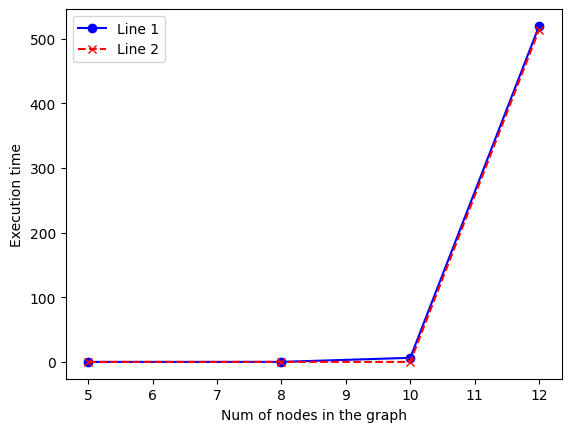

In [374]:
import matplotlib.pyplot as plt

num_nodes = [5, 8, 10, 12]


no_parallel = [0.000209756, 0.0611993, 6.33507, 519.514]
parallel = [0.000121288, 0.101192, 0.0223197, 513.832]

# Plot the first line graph
plt.plot(num_nodes, no_parallel, label='Line 1', color='blue', marker='o')

# Plot the second line graph
plt.plot(num_nodes, parallel, label='Line 2', color='red', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Num of nodes in the graph')
plt.ylabel('Execution time')

# Add a legend
plt.legend()

# Display the plot
plt.show()


## Critérios de avaliação

A correção do projeto levará em conta:

+ [Até 1 pontos] **Organização geral**
  - Organização do código fonte e/ou do notebook que centraliza seus códigos. Se a entrega for via jupyter notebook, ele deve conter células markdown que guiem a apreciação do trabalho. Caso seu código esteja organizado em arquivos ".cpp", ".py", etc, submeta também um relatório em PDF descrevendo seu trabalho;

+ [Até 4 pontos] **Implementações**
  - Sua entrega deve conter ao menos 3 implementações (uma para cada solução: exaustiva, OpenMP e MPI). Soluções extras nestas vertentes são encorajadas e serão valorizadas;
  - A parte de MPI deve ser obrigatoriamente executada no cluster. Portanto, submeta também os arquivos de configuração dos executáveis em batch;
  - Esperamos códigos seguindo as boas práticas de implementação e devidamente comentados;

+ [Até 3 pontos] **Avaliação de resultados**
  - Comparações das abordagens com tamanhos diferentes de grafos;
  - Clareza na comunicação dos resultados. Ex: gráficos e/ou pequenos textos que descrevem os resultados obtidos;
  - Justificativas: é esperado que a execução paralela seja mais rápida que a sequencial, assim como uma heurística seja mais rápida que a abordagem exaustiva. Caso seus resultados diferem do esperado, argumente potenciais causas;

+ [Até 1 ponto] **Extras**
  - A rubrica não cita o máximo de implementações a ser feita. Caso você opte por fazer algo além das 4 solicitadas, daremos até 1 ponto extra na nota do trabalho pelo esforço;


